In [393]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [394]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [396]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [397]:
# master_age_na_idx = df[(df['Name'].str.contains('Master')) & (df['Age'].isna())]['Age'].index
# master_age_not_na_idx = df[(df['Name'].str.contains('Master')) & (df['Age'].notnull())]['Age'].index
# master_median_age = df.loc[master_age_not_na_idx]['Age'].median()
# # print(len(master_age_not_na_idx))

# df.loc[master_age_na_idx,'Age'] = master_median_age
# df.loc[master_age_na_idx]

# adult_age_na_idx = df[(~df['Name'].str.contains('Master')) & (df['Age'].isna())]['Age'].index
# adult_age_not_na_idx = df[(~df['Name'].str.contains('Master')) & (df['Age'].notnull())]['Age'].index
# # print(len(adult_age_na_idx),len(adult_age_not_na_idx))

# # 173+678

# adult_median_age = df.loc[adult_age_not_na_idx]['Age'].median()
# adult_median_age

# df.loc[adult_age_na_idx,'Age'] = adult_median_age
# df.loc[adult_age_na_idx].head()

# df1 = df.copy()
# df.drop(columns=['Cabin','Fare','Ticket','Name','PassengerId'], inplace=True, axis=1)
# df.head()

# df['SibSp'].unique()

# df['Parch'].unique()

# df.info()

# df2 = pd.get_dummies(df, columns=['Pclass','Sex','SibSp','Parch','Embarked'])
# df2.head()

In [398]:
# y = df2['Survived']
# df3 = df2.drop(columns='Survived', axis=1)
# X = df3.to_numpy()

# X.shape

# from sklearn.model_selection import StratifiedKFold
# from sklearn.linear_model import LogisticRegression

# y_preds = []
# skf = StratifiedKFold(n_splits=3, random_state=1)
# for train_idx, test_idx in skf.split(X,y):
#     X_train, X_test = X[train_idx], X[test_idx]
#     y_train, y_test = y[train_idx], y[test_idx]
#     logit = LogisticRegression(random_state=1)
#     logit.fit(X_train, y_train)
#     print(logit.score(X_test, y_test))
# #     y_pred = logit.predict(X_test)
# #     y_preds.append(y_pred)

In [399]:
# df_test = pd.read_csv('data/test.csv')
# df_test.head()

### More EDA based on https://www.kaggle.com/brendan45774/titanic-how-i-become-the-top-1

#### % of women who survived

In [ ]:
df.head()

In [432]:
df[(df['Survived']==1) & (df['Sex']=='female')].shape[0] / df[(df['Sex']=='female')].shape[0]

0.7420382165605095

In [436]:
women_survived = df[df['Sex']=='female']['Survived']
sum(women_survived) / len(women_survived)

0.7420382165605095

In [437]:
men_survived = df[df['Sex']=='male']['Survived']
sum(men_survived) / len(men_survived)

0.18890814558058924

In [438]:
df['Age'].mean()

29.69911764705882

In [442]:
df.loc[df['Age'].isna(),'Age'] = df['Age'].mean()

In [444]:
df['Age'].isna().sum()

0

#### class based survival

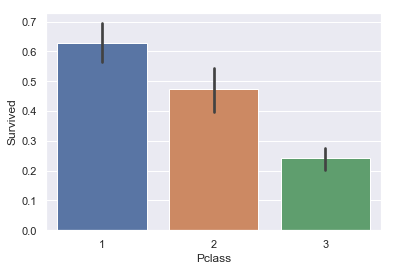

In [450]:
sns.barplot('Pclass','Survived',data=df)

#### Port of embarkment affects survival

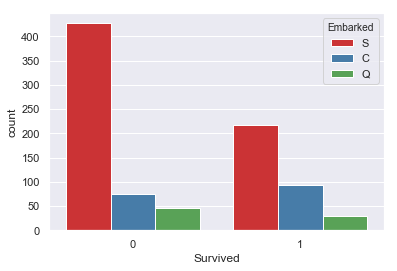

In [460]:
sns.set(style='darkgrid')
sns.countplot(x='Survived', data=df, hue='Embarked', palette='Set1')

In [446]:
# drawing: distribution of age of men and women who survived 
label_survived = 'survived'
label_not_survived = 'not survived'

age_women_survived = df.loc[(df['Sex']=='female') & (df['Survived']==1), 'Age']
age_women_not_survived = df.loc[(df['Sex']=='female') & (df['Survived']==0), 'Age']
age_men_survived = df.loc[(df['Sex']=='male') & (df['Survived']==1), 'Age']
age_men_not_survived = df.loc[(df['Sex']=='male') & (df['Survived']==0), 'Age']



Text(0.5, 1.0, 'Male')

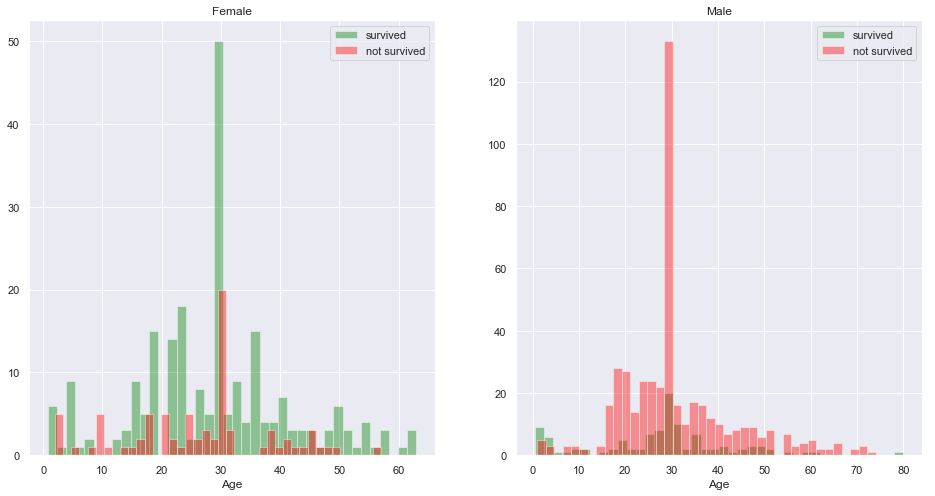

In [449]:
# data ready, begin plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
n_bins = 40
ax = sns.distplot(a=age_women_survived, 
                  bins=n_bins, 
                  kde=False,
                  label=label_survived,
                  ax=axes[0],
                  color='green')
ax = sns.distplot(a=age_women_not_survived,
                  bins=n_bins,
                  kde=False,
                  label=label_not_survived,
                  ax=axes[0],
                  color='red'
                 )
ax.legend()
ax.set_title('Female')

ax = sns.distplot(a=age_men_survived,
                  bins=n_bins,
                  kde=False,
                  label=label_survived,
                  ax=axes[1],
                  color='green'
                 )
ax = sns.distplot(a=age_men_not_survived,
                  bins=n_bins,
                  kde=False,
                  label=label_not_survived,
                  ax=axes[1],
                  color='red'
                 )
ax.legend()
ax.set_title('Male')

### Adding Relevant Features

/Users/shubhamtripathi/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


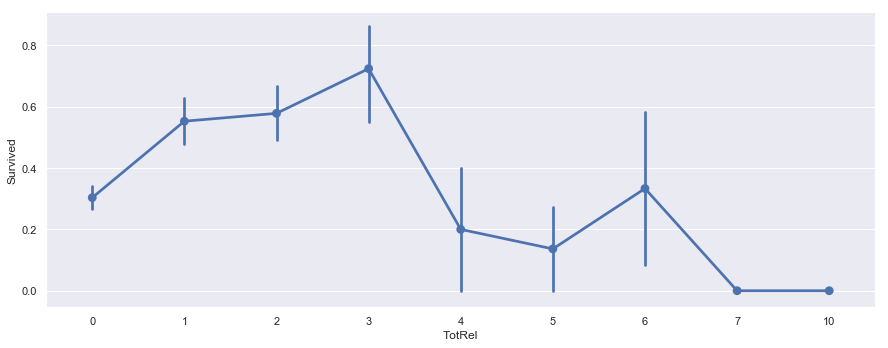

In [465]:
df['TotRel'] = df['Parch'] + df['SibSp']
axes = sns.factorplot('TotRel','Survived',data=df,aspect=2.5)

In [467]:
df['TravelAlone'] = df['TotRel'] == 0
df['TravelAlone'].head()

0    False
1    False
2     True
3    False
4     True
Name: TravelAlone, dtype: bool

#### scale numerical features?


In [474]:
from sklearn.preprocessing import StandardScaler
def scale_numeric_features(df):
    numeric_features = list(df.select_dtypes(include=['int64','float64','int32']).columns)
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(data=df)
    df_scaled[numeric_features] = scaler.fit_transform(df_scaled[numeric_features])
    return df_scaled

In [517]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotRel,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True


In [519]:
categorical_cols = ['Pclass','Sex','SibSp','Parch','Embarked']
drop_cols = ['PassengerId','Ticket','Name','Cabin','Fare']
y = df['Survived']
# try to map gender to {0,1}
df_train = pd.get_dummies(data=df, columns=categorical_cols)
df_train = df_train.drop(columns=drop_cols, axis=1)
df_train = df_train.drop(columns='Survived', axis=1)
# try applying scaling to select features. not to all ints and floats
# df_train_scaled = scale_numeric_features(df_train)
df_train.head()
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
Age            891 non-null float64
TotRel         891 non-null int64
TravelAlone    891 non-null bool
Pclass_1       891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
SibSp_0        891 non-null uint8
SibSp_1        891 non-null uint8
SibSp_2        891 non-null uint8
SibSp_3        891 non-null uint8
SibSp_4        891 non-null uint8
SibSp_5        891 non-null uint8
SibSp_8        891 non-null uint8
Parch_0        891 non-null uint8
Parch_1        891 non-null uint8
Parch_2        891 non-null uint8
Parch_3        891 non-null uint8
Parch_4        891 non-null uint8
Parch_5        891 non-null uint8
Parch_6        891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: bool(1), float64(1), int64(1), uint8

In [520]:
df_test_org = pd.read_csv('data/test.csv')
# df_test_scaled = scale_numeric_features(df_test)
df_test = df_test_org.copy()
df_test_PassengerId = df_test['PassengerId']
df_test['TotRel'] = df_test['Parch'] + df_test['SibSp']
df_test['TravelAlone'] = df_test['TotRel'] == 0
df_test = pd.get_dummies(data=df_test, columns=categorical_cols)
df_test.loc[df_test['Age'].isna(),'Age'] = df_test.loc[df['Age'].notnull(),'Age'].mean()
df_test.loc[df_test['Fare'].isna(),'Fare'] = df_test.loc[df['Fare'].notnull(),'Fare'].mean()
df_test = df_test.drop(columns=drop_cols, axis=1)

df_test.head()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 26 columns):
Age            418 non-null float64
TotRel         418 non-null int64
TravelAlone    418 non-null bool
Pclass_1       418 non-null uint8
Pclass_2       418 non-null uint8
Pclass_3       418 non-null uint8
Sex_female     418 non-null uint8
Sex_male       418 non-null uint8
SibSp_0        418 non-null uint8
SibSp_1        418 non-null uint8
SibSp_2        418 non-null uint8
SibSp_3        418 non-null uint8
SibSp_4        418 non-null uint8
SibSp_5        418 non-null uint8
SibSp_8        418 non-null uint8
Parch_0        418 non-null uint8
Parch_1        418 non-null uint8
Parch_2        418 non-null uint8
Parch_3        418 non-null uint8
Parch_4        418 non-null uint8
Parch_5        418 non-null uint8
Parch_6        418 non-null uint8
Parch_9        418 non-null uint8
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
dtypes: bo

In [521]:
import numpy as np
feat_diff = set(df_test) - set(df_train)
df_train = df_train.join(
    pd.DataFrame(
        data=np.zeros((df_train.shape[0],len(feat_diff))), 
        index=df_train.index, 
        columns=list(feat_diff)
    )
)
print(df_train.shape,df_test.shape)
print('Added Features:',feat_diff)

(891, 26) (418, 26)
Added Features: {'Parch_9'}


In [522]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
X_train = df_train.to_numpy()
X_test = df_test.to_numpy()
rf_model.fit(X_train, y)
y_preds = rf_model.predict(X_test)


In [523]:
df_y_pred = pd.DataFrame(data=y_preds, index=df_test_PassengerId, columns=['Survived'])
df_y_pred.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [524]:
# df_y_pred.to_csv('sub_01_logistic_regression.txt')
# df_y_pred.to_csv('sub_02_logistic_regression_regularization.txt')
# df_y_pred.to_csv('sub_03_regularized_logistic_feat_categorical.txt')
# df_y_pred.to_csv('sub_05_decision_tree_max_depth.txt')
df_y_pred.to_csv('sub_08_random_forest_default_additional_features.txt')

### Classification 

In [400]:
def clean_data(df):
    # age
    master_age_na_idx = df[(df['Name'].str.contains('Master')) & (df['Age'].isna())]['Age'].index
    master_age_not_na_idx = df[(df['Name'].str.contains('Master')) & (df['Age'].notnull())]['Age'].index
    master_median_age = df.loc[master_age_not_na_idx]['Age'].median()

    df.loc[master_age_na_idx,'Age'] = master_median_age

    adult_age_na_idx = df[(~df['Name'].str.contains('Master')) & (df['Age'].isna())]['Age'].index
    adult_age_not_na_idx = df[(~df['Name'].str.contains('Master')) & (df['Age'].notnull())]['Age'].index

    adult_median_age = df.loc[adult_age_not_na_idx]['Age'].median()

    df.loc[adult_age_na_idx,'Age'] = adult_median_age
    df.loc[adult_age_na_idx].head()
    
    
    df.drop(columns=['Cabin','Fare','Ticket','Name'], inplace=True, axis=1)

    df = pd.get_dummies(df, columns=['Pclass','Sex','Embarked','Parch','SibSp'])

    return df

In [401]:
df_train = pd.read_csv('data/train.csv')
df_train = clean_data(df_train)

df_test = pd.read_csv('data/test.csv')
df_test = clean_data(df_test)

In [402]:
df_train.head()

,PassengerId,Survived,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Parch_4,Parch_5,Parch_6,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,1,0,22.0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,38.0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1,26.0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1,35.0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,35.0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [403]:
import numpy as np
feat_diff = set(df_test) - set(df_train)
df_train = df_train.join(
    pd.DataFrame(
        data=np.zeros((df_train.shape[0],len(feat_diff))), 
        index=df_train.index, 
        columns=list(feat_diff)
    )
)
# feat_diff = set(df_train) - set(df_test)
# df_test = df_test.join(
#     pd.DataFrame(
#         data=np.zeros((df_test.shape[0],len(feat_diff))), 
#         index=df_test.index, 
#         columns=list(feat_diff)
#     )
# )


In [404]:
len(df_train.columns)

26

In [405]:
len(df_test.columns)

25

In [406]:
y = df_train['Survived']
df_train.drop(columns=['PassengerId','Survived'], axis=1, inplace=True)
X = df_train.to_numpy()

In [407]:
df_test_pid = df_test['PassengerId']
df_test.drop(columns=['PassengerId'], axis=1, inplace=True)
X_test = df_test.to_numpy()
df_test.head()

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Parch_0,...,Parch_5,Parch_6,Parch_9,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,34.5,0,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,47.0,0,0,1,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,62.0,0,1,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,27.0,0,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,22.0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Logistic Regresssion

In [408]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logitcv = LogisticRegressionCV(cv=10, random_state=1, max_iter=1000)
clf = logitcv.fit(X,y)
# skf = StratifiedKFold(n_splits=3, random_state=1)
# for train_idx, test_idx in skf.split(X,y):
#     X_train, X_test = X[train_idx], X[test_idx]
#     y_train, y_test = y[train_idx], y[test_idx]
#     logit = LogisticRegression(random_state=1)
#     logit.fit(X_train, y_train)
#     print(logit.score(X_test, y_test))

In [409]:
print(clf.classes_)
print(clf.Cs_)
clf.scores_

[0 1]
[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]


{1: array([[0.61111111, 0.62222222, 0.71111111, 0.76666667, 0.77777778,
         0.78888889, 0.78888889, 0.78888889, 0.78888889, 0.78888889],
        [0.61111111, 0.61111111, 0.7       , 0.8       , 0.78888889,
         0.81111111, 0.81111111, 0.81111111, 0.8       , 0.8       ],
        [0.61797753, 0.61797753, 0.68539326, 0.80898876, 0.78651685,
         0.78651685, 0.78651685, 0.78651685, 0.78651685, 0.78651685],
        [0.61797753, 0.61797753, 0.83146067, 0.86516854, 0.85393258,
         0.83146067, 0.82022472, 0.82022472, 0.82022472, 0.82022472],
        [0.61797753, 0.61797753, 0.78651685, 0.83146067, 0.79775281,
         0.79775281, 0.80898876, 0.80898876, 0.80898876, 0.80898876],
        [0.61797753, 0.61797753, 0.79775281, 0.80898876, 0.79775281,
         0.79775281, 0.79775281, 0.79775281, 0.79775281, 0.79775281],
        [0.61797753, 0.61797753, 0.75280899, 0.7752809 , 0.79775281,
         0.80898876, 0.80898876, 0.80898876, 0.80898876, 0.80898876],
        [0.61797753, 0.6

In [410]:
clf.score(X,y)

0.813692480359147

In [411]:
# logit = LogisticRegression(random_state=1)
# logit.fit(X_train, y_train)
y_pred = clf.predict(df_test.to_numpy())


### Decision Tree

In [412]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1, min_samples_split=2, max_depth=5)
np.mean(cross_val_score(clf, X, y, cv=10))

0.8283736238792418

In [413]:
clf.fit(X,y)
y_pred = clf.predict(X_test)

### Random Forest

In [422]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X, y)

y_pred = clf.predict(X_test)

/Users/shubhamtripathi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [423]:
clf.score(X,y)

0.8249158249158249

### Write results to file

In [424]:
df_y_pred = pd.DataFrame(data=y_pred, index=df_test_pid, columns=['Survived'])
df_y_pred.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [425]:
# df_y_pred.to_csv('sub_01_logistic_regression.txt')
# df_y_pred.to_csv('sub_02_logistic_regression_regularization.txt')
# df_y_pred.to_csv('sub_03_regularized_logistic_feat_categorical.txt')
# df_y_pred.to_csv('sub_05_decision_tree_max_depth.txt')
df_y_pred.to_csv('sub_06_random_forest_default.txt')